<h1> BPC-BIN: 11. cvičení - Signálové zpracování </h1>

## <u>Reprezentace komplexními čísly</u>

* projekce čtyřstěnu do komplexní roviny
* osa x - reálná osa
* osa z - imaginární osa

  A = 1 + 1i </br>
  C = -1 -1i </br>
  G = -1 + 1i </br>
  T = 1 - 1i </br>

![](https://drive.google.com/uc?export=view&id=1UIkM5FZBOSxZeaZMGT1GfvawaEgE6Gnz)



## <u>Fázová charakteristika</u>

* reprezentace komplexními čísly má fázovou charakteristiku
* vhodné pro analýzu a porovnávání velmi dlouhých sekvencí (celé chromozomy a genomy), pro analýzu chromozomálních mutací
* viditelné rozdíly mezi kódujícími a nekódujícími oblastmi 
* pro nukleotidy je hodnota úhlu v radiánech: 

  Φa = π/4 </br>
  Φc = -3π/4 </br>
  Φg = 3π/4 </br>
  Φt = -π/4 

![](https://drive.google.com/uc?export=view&id=14Q3hvoUgAxbBNcudx0ZQaZZJEB6KkVHy)



## <u>Kumulovaná fáze</u>

* kumulovaná fáze je 1D signál součtu fází nukleotidů od 1 do aktuálního

![](https://drive.google.com/uc?export=view&id=1n7vVxN2q1nCLWnf3_8xlR6FqaucdPMZe)


* kde nA, nC, nG a nT jsou počty nukleotidů v sekvenci od začátku do pozice M

* lze použít pro kontrolu správnosti sestavení genomu


![](https://drive.google.com/uc?export=view&id=14pNc_TP8F1qntvk6yRI__F7b3qO2Xj4T)




In [ ]:
pip install biopython

     |████████████████████████████████| 2.3 MB 5.0 MB/s 


## <u>Úkol 1:</u> <br>

Vytvořte funkci *cum_phase* pro výpočet kumulované fáze nukleotidové sekvence.

* vstup funkce - nukleotidová sekvence
* výstup funkce - pole s vypočtenou kumulovanou fází

Ukázka volání funkce:
```
cum_phase('ATTGCTAAC')
```
Ukázka výstupu:
```
array([ 0.78539816,  0.        , -0.78539816,  1.57079633, -0.78539816,
       -1.57079633, -0.78539816,  0.        , -2.35619449])
```





In [ ]:
from Bio import SeqIO
import numpy as np
import math

def cum_phase(sequence):
  N = len(sequence)
  phase = np.zeros(N)

  for i in range(0,len(sequence)):
    if sequence[i] == 'A':
      phase[i] = math.pi/4
    elif sequence[i] == 'T':
      phase[i] = -(math.pi/4)
    elif sequence[i] == 'G':
      phase[i] = (3*math.pi/4)
    elif sequence[i] == 'C':
      phase[i] = -(3*math.pi/4)

    
  phase_cum = np.zeros(N)
  phase_cum[0] = phase[0]

  for i in range(1,len(sequence)):
    phase_cum[i] = phase_cum[i-1] + phase[i]
  
  return(phase_cum)



cum_phase('ATTGCTAAC')

## <u>Úkol 2:</u> <br>
* Proveďte analýzu kumulované fáze pro 2 kompletní genomy.
* Z NCBI z databáze Nucleotide si stáhněte sekvenci chromosomu pro *Rhodospirillum rubrum strain DSM 467* a pro *Lutra lutra* si stáhněte sekvenci mitochondriálního genomu.

* Pro každou sekvenci vypočítejte a vykreslete do samostatného grafu kumulovanou fázi. 
* Pro každou sekvenci si vytvořte komplementární vlákno a opět vypočítejte a vykreslete jejich kumulovanou fázi.

* Jako výsledek dostanete 2 grafy, kde vždy jeden graf bude obsahovat kumulovanou fázi pro vedoucí a komplementární vlákno daného organismus.


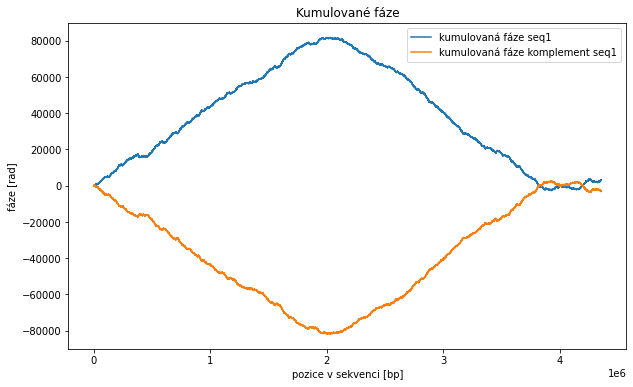

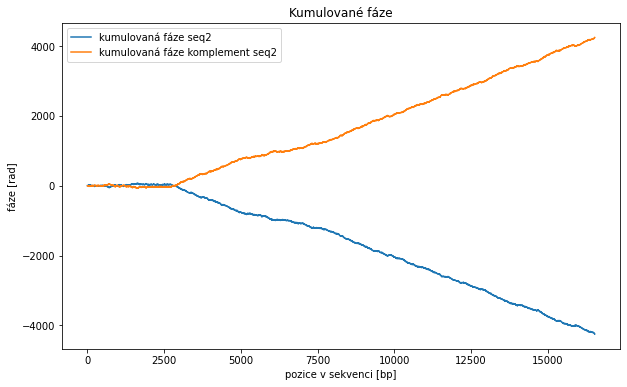

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
import matplotlib.pyplot as plt


seq1 = SeqIO.read('Rhodospirillum rubrum.fasta', 'fasta')
seq2 = SeqIO.read('Lutra lutra.fasta', 'fasta')


cum_phase1 = cum_phase(seq1)
cum_phase2 = cum_phase(seq2)


complement1 = seq1.seq.complement()
cum_phase1_complement = cum_phase(complement1)

complement2 = seq2.seq.complement()
cum_phase2_complement = cum_phase(complement2)


fig,ax = plt.subplots(figsize=(10,6))
ax.plot(cum_phase1, label='kumulovaná fáze seq1') 
ax.plot(cum_phase1_complement, label='kumulovaná fáze komplement seq1') 
ax.set_xlabel('pozice v sekvenci [bp]')
ax.set_ylabel('fáze [rad]')
ax.set_title("Kumulované fáze") 
ax.legend()

fig, ax = plt.subplots(figsize=(10,6)) 
ax.plot(cum_phase2, label='kumulovaná fáze seq2') 
ax.plot(cum_phase2_complement, label='kumulovaná fáze komplement seq2') 
ax.set_xlabel('pozice v sekvenci [bp]')
ax.set_ylabel('fáze [rad]')
ax.set_title("Kumulované fáze") 
ax.legend()

## <u>Diskrétní Fourierova transformace pro predikci kódujících úseků DNA </u>


* některé části DNA sekvencí vykazují periodu opakování rovnou 3 
→ odpovídá struktuře kodonů
* eukaryota - periodicita převažuje v exonech, v intronech se nevyskytuje; většina prokaryot, některé viry, mitochondrie - periodicita v celém genomu
* jaderná DNA eukaryot - periodicita odpovídá oblastem kódujících proteiny
→ lze použít jako prvotní indikátor genů
* nalezení periody opakování T = 3
  * provedení DFT indikačních vektoru uA, uC, uG, uT
  * výsledek: peak ve frekvenčním spektru na frekvenci ⅓ Hz

* rovnice pro DFT:
  * N - délka sekvence
  * k - koeficient Fourierovy řady od 0 do délky sekvence N
  * n - pořadí vzorku v indikačním vektoru

![](https://drive.google.com/uc?export=view&id=1KQs5onXYqWTFGKKpE30EoGaJc4095J_m)

* výpočet výkonového spektra: 

![](https://drive.google.com/uc?export=view&id=1m7UG88UCSr7oiuf5MFiZ6vXwsEkvPwX-)

* ve spektru hledáme charakteristickou frekvenci
* frekvence normalizovaná délkou N (hodnoty od 0 do 1)
* frekvence ve spektru není vyjádřením počtu vzorků v jednotce času, ale počet nukleotidů v jednotce délky




## <u>Úkol 3:</u> <br>

Vytvořte funkci *DFT*, která Vám pro zadanou nukleotidovou sekvenci vypočítá výkonové spektrum. Pozor - spektrální koeficient k se počítá v rozsahu 1 až N/2.

* vstup funkce - FASTA soubor obsahující nukleotidovou sekvenci
* výstup funkce - graf výkonového spektra

Ukázka volání funkce:
```
DFT("NC_012920.1_2000-5000.fasta") 
```
Ukázka výstupu:

![](https://drive.google.com/uc?export=view&id=1docXZstfVgE434H2xoL2_s4wR_t-olYx)

**Vytvořenou funkci otestujte na sekvenci NC_012920.1_2000-5000.fasta, kterou si stáhnete z elearningu.**


Text(0.5, 1.0, 'Vykonové spektrum')

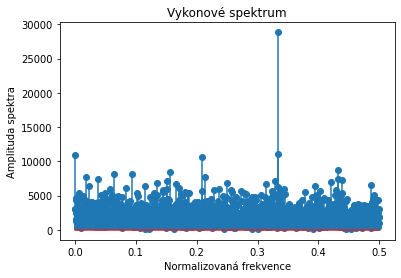

In [ ]:
# import balíčků a knihoven
from Bio import SeqIO
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

# definice funkce
def binar_seq(sequence):

  m = 4
  n = len(sequence)
  M = np.zeros((m, n))

  # procházení sekvence
  for i in range(n):
    if sequence[i] == 'A':
      M[0,i] = 1
    elif sequence[i] == 'C':
      M[1,i] = 1
    elif sequence[i] == 'G':
      M[2,i] = 1
    elif sequence[i] == 'T':
      M[3,i] = 1

  # return matice
  return M

# definice funkce
def DFT(sequence):
  sequence = (SeqIO.read('NC_012920.1_2000-5000.fasta', 'fasta')).seq
  N = len(sequence)
  sequence = sequence.upper()
  
  bin = binar_seq(sequence)

  coef_U_A = np.zeros(math.floor(N/2), dtype='complex')
  coef_U_C = np.zeros(math.floor(N/2), dtype='complex')
  coef_U_G = np.zeros(math.floor(N/2), dtype='complex')
  coef_U_T = np.zeros(math.floor(N/2), dtype='complex')

  for i in range(1, math.floor(N/2)+1):  
    for j in range(0, N):
      coef_U_A[i-1] = coef_U_A[i-1] + bin[0,j] * cmath.exp(-2*1j*math.pi*i*j/N)
      coef_U_C[i-1] = coef_U_C[i-1] + bin[1,j] * cmath.exp(-2*1j*math.pi*i*j/N)
      coef_U_G[i-1] = coef_U_G[i-1] + bin[2,j] * cmath.exp(-2*1j*math.pi*i*j/N)
      coef_U_T[i-1] = coef_U_T[i-1] + bin[3,j] * cmath.exp(-2*1j*math.pi*i*j/N)

  x = np.linspace(0, 0.5, math.floor(N/2))
  S = abs(coef_U_A)**2 + abs(coef_U_C)**2 + abs(coef_U_G)**2 + abs(coef_U_T)**2

  return x, S


# volání funkce
out = DFT('NC_012920.1_2000-5000.fasta')
x = out[0]
S = out[1]

# vykreslení 
fig, ax = plt.subplots()
plt.stem(x, S, use_line_collection = True)
ax.set_xlabel('Normalizovaná frekvence')
ax.set_ylabel('Amplituda spektra')
ax.set_title('Vykonové spektrum')




